# Wstęp do Sztucznej Inteligencji - rok akademicki 2021/2022

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Optymalizacja globalna: Prosty algorytm genetyczny - Zadania
Zapoznaj się z treścią niniejszego notatnika czytając i wykonując go komórka po komórce. Wykonaj napotkane zadania/ćwiczenia.

## Import bibliotek

In [6]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

## Zadanie 1  (obowiązkowe, 1pkt.)
W komórce poniżej wprowdź swój nr albumu a następnie ją wykonaj:

In [7]:
nr_albumu = 139878
nr_funkcji = (nr_albumu % 16) + 1
print('Twój nr funkcji celu to:', nr_funkcji if nr_funkcji != 6 else 7)

Twój nr funkcji celu to: 7


Zgodnie z wygenerowanym numerem, wybierz funkcję celu ze strony: https://www.sfu.ca/~ssurjano/optimization.html z działu "Many Local Minima".

Zaplementuj ją jako funkcję w Pythonie.

Dla wszystkich funkcji przyjmujemy `N=2` tzn. rozważamy ją jako funkcję dwóch zmiennych $f(x_1, x_2)$.

TWÓJ PROGRAM:

In [8]:
def obj_func(x):
  return (x[0]**2+x[1]**2)/4000 - (np.cos(x[0]/np.sqrt(1)) * np.cos(x[1]/np.sqrt(2))) + 1

print(obj_func((1,2)))

0.9169932621326707


## Zadanie 2  (obowiązkowe, 1pkt.)
Przygotuj wykres 3D funkcji zaimplementowanej w zadaniu nr 1.

TWÓJ PROGRAM:

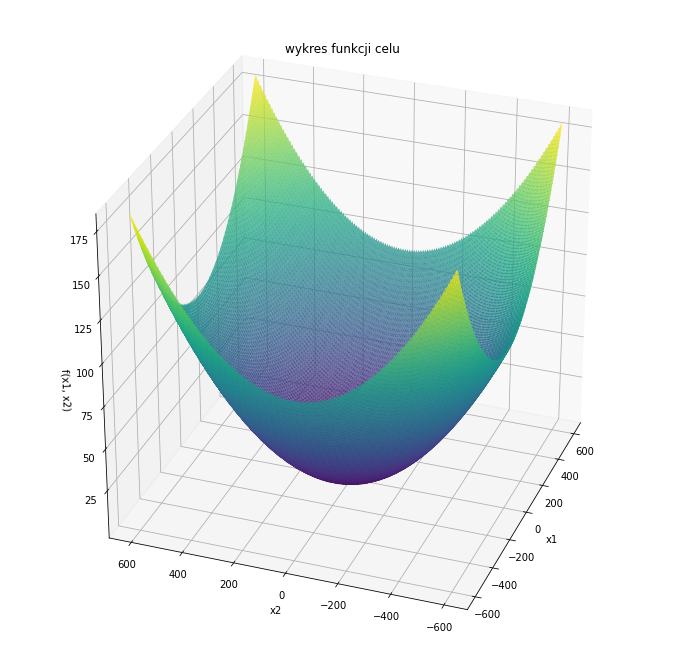

In [5]:
from mpl_toolkits.mplot3d import Axes3D  # Required for 3D plotting

sampledx = np.linspace(-600, 600, 500)
sampledy = np.linspace(-600, 600, 500)

x, y = np.meshgrid(sampledx, sampledy)
z = np.zeros((len(sampledx),len(sampledy)))


for i in range(len(sampledx)):
  #print(x[i])
  for j in range(len(sampledy)):
        z[i, j] = obj_func((x[i,j],y[i,j]))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('wykres funkcji celu')
ax.view_init(30, 200)

## Zadanie 3 (obowiązkowe, 2pkt.)
Korzystając z funkcji zaimplementowanych na poprzednich zajęciach, zaimplementuj główną pętlę klasycznego algorytmu genetyczengo.
![pag_schemat.png](http://torus.uck.pk.edu.pl/~amarsz/images/pag_schemat.png)

Implementacja powinna mieć postać funkcji, która przyjmuje parametry:

- `fun` - funkcja, której maksimum ma zostać znalezione
- `pop_size` - rozmiar populacji
- `pk` - prawdopodobieństwo krzyżowania
- `pm` - prawdopodobieństwo mutacji
- `generations` - liczba pokoleń 
- `dx` - dokładność kodowania

Funkcja powinna zwracać:
- `best_sol` - najlepsze znalezione rozwiązanie (nieważne, w której iteracji; UWAGA! niekoniecznie jest to najlepszy osobnik z ostatniej populacji)
- `best_generation` - numer pokolenia, z którego pochodzi najlepsze rozwiązanie
- `list_best` - lista z najlepszą oceną osobnika w każdym pokoleniu (najlepsza ocena znaleziona w danym pokoleniu lub wcześniej)
- `list_best_generation` - lista z najlepszymi ocenami w każdym pokoleniu (najlepsza ocena z danej populacji)
- `list_mean` - lista z wartościami średnimi ocen osobników z każdego pokolenia

TWÓJ PROGRAM:

In [9]:
def listToString(s):
  str1 = ""
  for ele in s:
    str1 += str(ele)
  return str1

def decode_individual(individual, N, B, a, dx):
    decoded_solution = np.ndarray(shape = (N))
    j=0
    for licznik in range(0,N):
      ind = individual[j:j + B]
      j+=B
      i=int(listToString(ind), 2)
      aaa = listToString(ind)
      #print(f"aaa = {aaa}")
      #print(f"i = {i}")
      #print(f"i*dx = {i*dx}")
      decoded_solution[licznik]=( a + i*dx)
    return decoded_solution

def evaluate_population(func, pop, N, B, a, dx):
    evaluated_pop = np.ndarray(shape = (len(pop)))
    for i, ind in enumerate(pop):
      evaluated_pop[i]=func(decode_individual(ind,N,B,a,dx))
    return evaluated_pop

In [10]:
def gen_population(P, N, B, a, b, dx):
  pop = np.ndarray(shape = (P, B*N), dtype = int)
  i = 0
  while i < P:
    #print(i)
    for j in range(0, B*N):
      pop[i][j] = np.random.randint(0,2)
    if ( (a<decode_individual(pop[i], N, B, a, dx)[0]<b) and (a<decode_individual(pop[i], N, B, a, dx)[1]<b)):
      #print(decode_individual(pop[i], N, B, a, dx))
      i+=1
  return pop


In [11]:
def get_best(pop, evaluated_pop, current_generation):
    best_value = np.amax(evaluated_pop)
    index = np.where(evaluated_pop == best_value)
    best_individual = pop[index][0]
    return best_individual, best_value, current_generation

In [12]:
def roulette(pop, evaluated_pop):

  new_evaluated_pop=[i/evaluated_pop.sum() for i in evaluated_pop]
  new_new_evaluated_pop = new_evaluated_pop.copy()
  #print(new_evaluated_pop)

  for i in range(1,len(new_evaluated_pop)):
    new_new_evaluated_pop[i] = new_evaluated_pop[i] + new_new_evaluated_pop[i-1] 

  new_pop = np.ndarray(shape=(len(pop),len(pop[0])), dtype = int)
  #(new_new_evaluated_pop)

  for i in range(len(pop)):
    zmienna = np.random.rand()
    #print(zmienna)
    for j in range(len(pop)):
      if zmienna < new_new_evaluated_pop[j]:
        for k in range(len(pop[j])):
          new_pop[i] = pop[j]
        break
  return new_pop 

In [13]:
def cross(pop, pk, a, b, dx, N, B):
    
   # print(pop)
    new_pop = np.ndarray(shape=(len(pop),len(pop[0])), dtype = int)

    for i in range(len(pop)):
      zmienna = np.random.rand()
      #print(zmienna)
      if zmienna < pk :
        while True:
          mutagen = np.random.randint(len(pop[0]))
          #print(mutagen)
          for j in range(mutagen):
            new_pop[i][j]=pop[i][j]
          for j in range(mutagen, len(pop[0])):
            new_pop[i][j]=pop[(i+1)%len(pop)][j]
          if  (a<decode_individual(new_pop[i], N, B, a, dx)[0]<b) and (a<decode_individual(new_pop[i], N, B, a, dx)[1]<b):
            break;
      else:
        new_pop[i] = pop[i]
        

    return new_pop

In [14]:
def mutate(pop, pm,a,b, dx, N, B):
    
    #print(pop)
    new_pop = np.ndarray(shape=(len(pop),len(pop[0])), dtype = int)

    for i in range(len(pop)):
      new_pop[i] = pop[i]
      is_mutation = np.random.rand()
      #print(is_mutation)
      if is_mutation < pm :
        while True:
          ktory_gen = np.random.randint(len(pop[0]))
          #print(ktory_gen)
          new_pop[i][ktory_gen]= (new_pop[i][ktory_gen] +1)%2

          if (a<decode_individual(new_pop[i], N, B, a, dx)[0]<b) and (a<decode_individual(new_pop[i], N, B, a, dx)[1]<b):
            break;
      
    return new_pop

In [15]:
# Miejsce na twój kod

def evolve(fun, pop_size, pk, pm, generations, dx):

    list_best = list()
    list_best_generation = list()
    list_mean = list()
    a = -600 # początek przedziału, liczba rzeczywsta, dla każdej zmiennej taki sam.
    b = 600 # koniec przedziału, liczba rzeczywsta, dla każdej zmiennej taki sam.
    N = 2
    n = math.ceil((b-a)/dx)
    B = n.bit_length() # liczba bitów na każdą ze zmiennych

    #print("generacja nr:-1 \n")

    #generuj początkową populację
    pop = gen_population(pop_size,N,B, a, b , dx)
    #oceń osobniki w populacji
    e_pop = evaluate_population(fun,pop, N, B, a, dx)
    #znajdź i zapamiętaj najlepsze rozwiązanie
    best_sol = []
    best_sol_value = -1
    best_generation = 0

    tmp_best_sol, tmp_best_sol_value, tmp_best_generation = get_best(pop, e_pop, -1,)
    if tmp_best_sol_value > best_sol_value:
      best_sol = tmp_best_sol
      best_sol_value=tmp_best_sol_value
      best_generation = tmp_best_generation

    #uaktualnij listy statystyk
    list_best.append(best_sol_value)
    list_best_generation.append(tmp_best_sol_value)
    list_mean.append(sum(e_pop)/len(e_pop))

    global pop_1, pop_half, pop_end
    pop_1 = pop

    #print(best_sol, best_sol_value, best_generation)
    #print()

    for i in range(generations):
        #print("generacja nr:%d \n" %i)
        #for i in range(len(pop)):
        #  print(decode_individual(pop[i], N, B, a, dx))
        
        #selekcja
        pop = roulette(pop,e_pop)
        
        #krzyżowanie
        pop = cross(pop, pk,a,b,dx, N, B)
        
        #mutacja
        pop = mutate(pop,pm,a,b,dx, N, B)
        
        #oceń osobniki w populacji
        e_pop = evaluate_population(fun,pop, N, B, a, dx)

        #znajdź i zapamiętaj najlepsze rozwiązanie, jeśli jest lepsze niż dotychczasowe najlepsze
        tmp_best_sol, tmp_best_sol_value, tmp_best_generation = get_best(pop, e_pop, i)
        if tmp_best_sol_value > best_sol_value:
          best_sol = tmp_best_sol
          best_sol_value=tmp_best_sol_value
          best_generation = tmp_best_generation

        #uaktualnij listy statystyk
        list_best.append(best_sol_value)
        list_best_generation.append(tmp_best_sol_value)
        list_mean.append(sum(e_pop)/len(e_pop))

        if i == generations/2:
          pop_half = pop
        
        #print(tmp_best_sol, tmp_best_sol_value, tmp_best_generation)
        #print(best_sol, best_sol_value, best_generation)
        #print()

    pop_end = pop
    return best_sol, best_generation, list_best, list_best_generation, list_mean


## Zadanie 4 (obowiązkowe, 1pkt.)

Zaprezentuj działanie algorytmu z przykładowymi wartościami parametrów:

- `pop_size`: 60
- `pk`: 0.7
- `pm`: 0.01
- `generations`: 200
- `dx`: 1e-10

Na wykresach funkcji 3D przedstaw położenie osobników z pierwszej populacji, w połowie ewolucji oraz końcowej populacji. Zaznacz wyraźnie położenie najlepszeg rozwiązania.

Na wykresach 2D przedstaw przebieg wartości z list z zebranymi statystykami (listy `list_best`, `list_best_generation`, `list_mean`) w zależności od numeru pokolenia. 

TWÓJ PROGRAM:

In [16]:
a = evolve(obj_func, 60, 0.7, 0.01, 200, 1e-10)
for i in a:
  print(i)

[1 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0
 1 1 1 0 1 0 0 1 1 0 1 0 0 1]
12
[165.32049685304727, 165.32049685304727, 165.32049685304727, 167.93084326614564, 167.93084326614564, 167.93084326614564, 167.93084326614564, 167.93084326614564, 167.93084326614564, 167.93084326614564, 167.93084326614564, 167.93084326614564, 170.56539490221633, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.16886735508982, 173.168867355089

In [17]:
print(decode_individual(a[0], 2, 44, -600, 1e-10))

[ 589.82139898 -585.0149955 ]


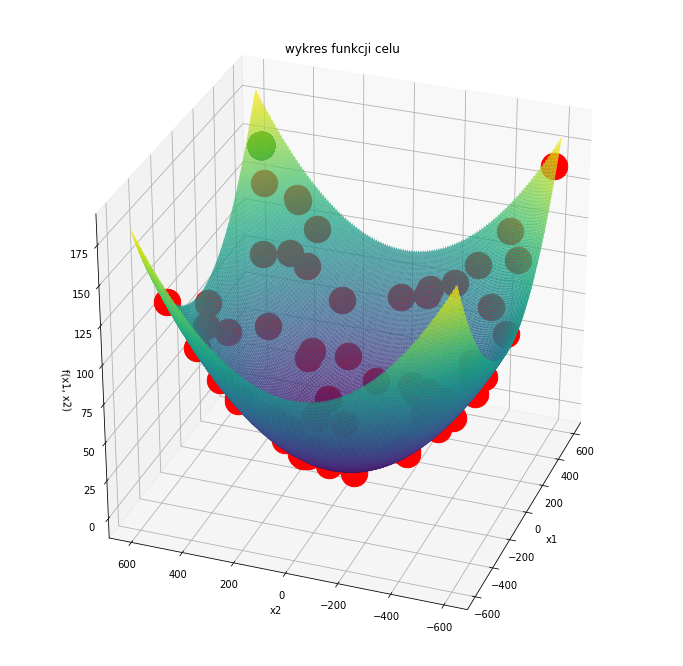

In [18]:
sampledx = np.linspace(-600, 600, 500)
sampledy = np.linspace(-600, 600, 500)

x, y = np.meshgrid(sampledx, sampledy)
z = np.zeros((len(sampledx),len(sampledy)))

n = math.ceil((600-(-600))/1e-10)
B = n.bit_length()
N = 2

for i in range(len(sampledx)):
  #print(x[i])
  for j in range(len(sampledy)):
        z[i, j] = obj_func((x[i,j],y[i,j]))

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='viridis', linewidth=0.4, antialiased=True)
for i in pop_1:
  f,g = decode_individual(i, N, B, -600, 1e-10)
  ax.scatter(f, g , obj_func((f,g)), s=700, c="red")
for i in pop_half:
  f,g = decode_individual(i, N, B, -600, 1e-10)
  ax.scatter(f, g , obj_func((f,g)), s=700, c="green")
for i in pop_end:
  f,g = decode_individual(i, N, B, -600, 1e-10)
  ax.scatter(f, g , obj_func((f,g)), s=700, c="blue")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('wykres funkcji celu')
ax.view_init(30, 200)

```
Na Czerwono zaznaczono osobników pierwszej generacji.
Na zielono osobników generacji, która była w połowie.
na niebiesko zaznaczono osobników ostatniej generacji.
Jak dobrze widać osobnicy z ostatniej generacji poprawnie wskazują nam maksimum funkcjiw tym przedziale
```

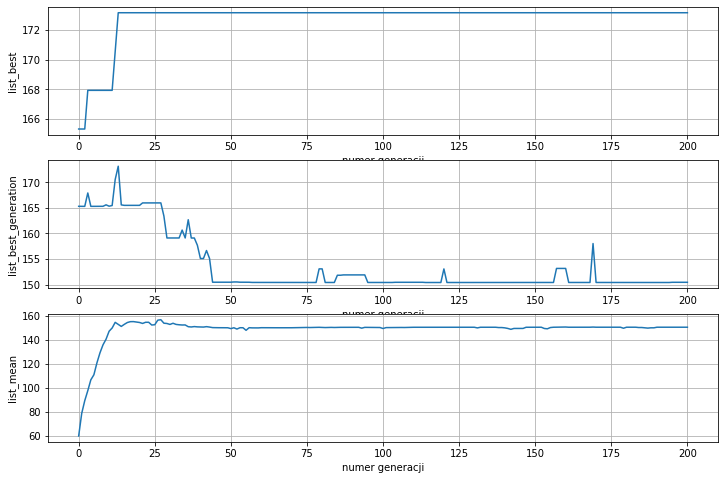

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Data for plotting


fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))
((ax1), (ax2), (ax3)) = axs
ax1.plot(a[2])
ax1.set(xlabel='numer generacji', ylabel='list_best')
ax1.grid()

ax2.plot(a[3])
ax2.set(xlabel='numer generacji', ylabel='list_best_generation')
ax2.grid()

ax3.plot(a[4])
ax3.set(xlabel='numer generacji', ylabel='list_mean')
ax3.grid()

plt.show()

## Zadanie 5 (obowiązkowe, 5pkt.)

Zbadaj wpływ parametrów klasycznego algorytmu genetycznego na jego zdolność znalezienia optymalnego rozwiązania. Dla ułatwienia analizy, zmieniając jeden parametr, zachowaj typowe wartości pozostałych.

1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.
    - `generations`: kilka różnych wartości z przedziału [100, 10000]
3. Czy mutacja jest potrzebna? 
    - `pm` = 0.0
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
    - `pk` = 0.0
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?
    - porównaj dwa ustawienia: `pop_size`=20, `generations`=100  vs. `pop_size`=100, `generations`=20.

UWAGA: Powyższe porównania powinny być wykonane na podstawie uśrednionych wyników co najmniej 10 uruchomień algorytmu z danymi parametrami. Podając wyniki podaj średnią z najlepszych znalezionych rozwiązań oraz odchylenie standardowe oraz numer pokolenia, w którym znaleziono rozwiązanie.

TWÓJ PROGRAM:

In [20]:
# Miejsce na twój kod

#przygotuj wartości parametrów AG
exec_num = 100 # lub więcej
tab = []

for i in range(exec_num):
    a = evolve(obj_func, 60, 0.7, 0.01, 200, 1e-10)
    tab.append(obj_func(decode_individual(a[0],2,44,-600, 1e-10)))
avg = np.sum(tab)/len(tab)  # znana wartość oczekiwana
# wariancja
s = np.sqrt(np.sum( (tab - avg)**2 ) / len(tab))
print(f"średnia = {avg}, odch. st. = {s}")

#wylicz średnią i odchylenie standardowe

średnia = 176.4120809765801, odch. st. = 2.9717023167910726


In [21]:

generations = [100, 1000, 4500, 10000]
for i in range(len(generations)):
  tab = list()
  best_gen_tab = list()
  for j in range(10):
    a = evolve(obj_func, 60, 0.7, 0.01, generations[i], 1e-10)
    tab.append(obj_func(decode_individual(a[0],2,44,-600, 1e-10)))
    best_gen_tab.append(a[1])
    print(f"generations = {generations[i]}")
    print(f"best_sol = {decode_individual(a[0],2,44,-600, 1e-10)}")
    print(f"best_sol_gen = {a[1]}")
    print()
  avg = np.sum(tab)/len(tab)  # znana wartość oczekiwana
  s = np.sqrt(np.sum( (tab - avg)**2 ) / len(tab))
  print(f"średnia = {avg}, odch. st. = {s}")
  
  avg_gen = np.sum(best_gen_tab)/len(best_gen_tab) 
  s1 = np.sqrt(np.sum( (best_gen_tab - avg_gen)**2 ) / len(best_gen_tab))
  print(f"średnia gen = {avg_gen}, odch. st. gen = {s1}")

generations = 100
best_sol = [ 584.50868742 -599.51298819]
best_sol_gen = 0

generations = 100
best_sol = [598.32563454 599.56428366]
best_sol_gen = 59

generations = 100
best_sol = [-591.87648805  553.65630911]
best_sol_gen = 96

generations = 100
best_sol = [-598.27203402 -596.16820592]
best_sol_gen = 6

generations = 100
best_sol = [-599.67089285  595.14417955]
best_sol_gen = 56

generations = 100
best_sol = [ 579.33616583 -594.159997  ]
best_sol_gen = 79

generations = 100
best_sol = [593.1496376  585.28310756]
best_sol_gen = 79

generations = 100
best_sol = [ 598.98167439 -599.92828472]
best_sol_gen = 60

generations = 100
best_sol = [-595.68448469 -594.86247592]
best_sol_gen = 6

generations = 100
best_sol = [ 596.31218182 -590.50146988]
best_sol_gen = 28

średnia = 176.66387376705876, odch. st. = 4.415461209236419
średnia gen = 46.9, odch. st. gen = 32.82514280243119
generations = 1000
best_sol = [ 599.73170615 -597.08774301]
best_sol_gen = 700

generations = 1000
best_sol = [59

In [73]:

tab = list()
for i in range(exec_num):
    a = evolve(obj_func, 60, 0.7, 0.0, 500, 1e-10)
    tab.append(obj_func(decode_individual(a[0],2,44,-600, 1e-10)))
    print(f"best_sol = {decode_individual(a[0],2,44,-600, 1e-10)}")
    print(f"best_sol_gen = {a[1]}")
    print()
avg = np.sum(tab)/len(tab)  # znana wartość oczekiwana
# wariancja
s = np.sqrt(np.sum( (tab - avg)**2 ) / len(tab))
print(f"średnia = {avg}, odch. st. = {s}")

best_sol = [-596.5572914  -598.03952817]
best_sol_gen = 57

best_sol = [-559.43740432 -599.6767485 ]
best_sol_gen = 4

best_sol = [-593.39167744 -599.89890896]
best_sol_gen = 4

best_sol = [-599.85057407  596.22790312]
best_sol_gen = 36

best_sol = [565.80930946 590.86713171]
best_sol_gen = 8

best_sol = [-586.31010369  594.15212507]
best_sol_gen = 1

best_sol = [-572.16315945  581.82451377]
best_sol_gen = 8

best_sol = [-580.72330513 -592.74181433]
best_sol_gen = 16

best_sol = [-598.38599507  580.61494227]
best_sol_gen = 15

best_sol = [ 593.97361411 -596.82522413]
best_sol_gen = 1

best_sol = [-582.20030066 -584.80415151]
best_sol_gen = 7

best_sol = [-588.8672014  -565.94108633]
best_sol_gen = 44

best_sol = [597.75277038 581.35209876]
best_sol_gen = 20

best_sol = [-580.26147097 -553.84885988]
best_sol_gen = 2

best_sol = [573.9906021  585.91593145]
best_sol_gen = 29

best_sol = [-593.8437981  -598.04081414]
best_sol_gen = 19

best_sol = [-597.94105954  596.52542414]
best_sol_gen 

In [74]:

tab = list()
for i in range(exec_num):
    a = evolve(obj_func, 60, 0.0, 0.01, 500, 1e-10)
    tab.append(obj_func(decode_individual(a[0],2,44,-600, 1e-10)))
    print(f"best_sol = {decode_individual(a[0],2,44,-600, 1e-10)}")
    print(f"best_sol_gen = {a[1]}")
    print()
avg = np.sum(tab)/len(tab)  # znana wartość oczekiwana
# wariancja
s = np.sqrt(np.sum( (tab - avg)**2 ) / len(tab))
print(f"średnia = {avg}, odch. st. = {s}")

best_sol = [-542.2608291  -585.12595553]
best_sol_gen = 121

best_sol = [-578.87965532  589.06323065]
best_sol_gen = 440

best_sol = [-595.89635316  581.5130213 ]
best_sol_gen = 416

best_sol = [-599.76033956 -595.1059    ]
best_sol_gen = 464

best_sol = [-598.85567407  597.11668096]
best_sol_gen = 332

best_sol = [-580.35592181  553.9708369 ]
best_sol_gen = 482

best_sol = [-567.97371724  586.72667844]
best_sol_gen = 310

best_sol = [597.22117264 577.7545901 ]
best_sol_gen = 309

best_sol = [597.67665004 595.69353686]
best_sol_gen = 499

best_sol = [-589.79030234  596.19507018]
best_sol_gen = 463

best_sol = [-590.44835407 -598.4013039 ]
best_sol_gen = 470

best_sol = [ 497.38535881 -596.9954576 ]
best_sol_gen = 485

best_sol = [ 576.71165432 -487.76251723]
best_sol_gen = 19

best_sol = [-595.92481901 -597.30266539]
best_sol_gen = 382

best_sol = [599.06039956 577.16866823]
best_sol_gen = 466

best_sol = [ 590.96588796 -577.21953236]
best_sol_gen = 219

best_sol = [ 599.97981092 -593.

In [75]:

tab = list()
for i in range(exec_num):
    a = evolve(obj_func, 20, 0.7, 0.01, 100, 1e-10)
    tab.append(obj_func(decode_individual(a[0],2,44,-600, 1e-10)))
    print(f"generations = {100}")
    print(f"best_sol = {decode_individual(a[0],2,44,-600, 1e-10)}")
    print(f"best_sol_gen = {a[1]}")
    print()

avg = np.sum(tab)/len(tab)  # znana wartość oczekiwana
# wariancja
s = np.sqrt(np.sum( (tab - avg)**2 ) / len(tab))
print(f"średnia = {avg}, odch. st. = {s}")

tab = list()
for i in range(exec_num):
    a = evolve(obj_func, 100, 0.7, 0.01, 20, 1e-10)
    tab.append(obj_func(decode_individual(a[0],2,44,-600, 1e-10)))
    print(f"generations = {20}")
    print(f"best_sol = {decode_individual(a[0],2,44,-600, 1e-10)}")
    print(f"best_sol_gen = {a[1]}")
    print()

avg = np.sum(tab)/len(tab) # znana wartość oczekiwana
# wariancja
s = np.sqrt(np.sum( (tab - avg)**2 ) / len(tab))
print(f"średnia = {avg}, odch. st. = {s}")

generations = 100
best_sol = [592.76898378 590.15891606]
best_sol_gen = 45

generations = 100
best_sol = [ 523.39693068 -564.72595486]
best_sol_gen = 0

generations = 100
best_sol = [-564.67745282 -579.97020822]
best_sol_gen = 14

generations = 100
best_sol = [572.84377696 578.93989433]
best_sol_gen = 3

generations = 100
best_sol = [-597.23233444 -598.36232763]
best_sol_gen = 7

generations = 100
best_sol = [591.02891419 589.33151666]
best_sol_gen = 83

generations = 100
best_sol = [593.67813723 582.78839428]
best_sol_gen = 30

generations = 100
best_sol = [-570.67155812 -572.26833174]
best_sol_gen = 57

generations = 100
best_sol = [-584.15705208  584.24645159]
best_sol_gen = 9

generations = 100
best_sol = [-542.98069649  495.0757805 ]
best_sol_gen = 23

generations = 100
best_sol = [ 597.24346934 -593.19283471]
best_sol_gen = 4

generations = 100
best_sol = [-589.03251646 -590.72844935]
best_sol_gen = 4

generations = 100
best_sol = [ 464.90964094 -588.31857821]
best_sol_gen = 93



UMIEŚĆ TWOJE WNIOSKI I KOMENTARZE W KOMÓRCE PONIŻEJ

Odnieś się do każdego punktu.

## odpowiedzi
1. Jak działa algorytm z typowymi ustawieniami parametrów (jak w zadaniu 4)? Podaj średnią wartość przystosowania znalezionego rozwiązania po wielokrotnym uruchomieniu AG.

  ```
  średnia = 176.4120809765801, odch. st. = 2.9717023167910726
  ```
2. Czy wydłużenie ewolucji przynosi poprawę czy też następuje "nasycenie"? Porównaj zarówno jak dobre rozwiązanie zostało znalezione jak również w której generacji.

  Jak widać poniżej im więcej generacji tym lepsze przybliżenie, jednakże jest to naprawdę niewielka różnica - definitywnie nie opłaca się dawać zbyt wielkiej liczby generacji, bo to zwyczajnie nie zmieni za dużo, a najlepszy wynik wystąpi o wiele później:
  ``` 
100:
średnia = 176.66387376705876, odch. st. = 4.415461209236419
średnia gen = 46.9, odch. st. gen = 32.82514280243119
1000:
średnia = 178.84642090335814, odch. st. = 2.361153692225782
średnia gen = 367.0, odch. st. gen = 381.15666070528005
4500:
średnia = 179.73463343665063, odch. st. = 0.759250270929783
średnia gen = 2049.0, odch. st. gen = 1627.400258080353
10000:
średnia = 180.35132488740982, odch. st. = 0.5928156222743669
średnia gen = 4887.1, odch. st. gen = 3270.9020605942937
```

3. Czy mutacja jest potrzebna? 

    w porównaniu do wyniku z polecenia 1 jest to niewielka różnica
    ``` 
    średnia = 174.86163071304128, odch. st. = 4.435575771993125
     ```
4. Jak działa algorytm bez krzyżowania, z samą mutacją? 
  Z samą mutacją jest trochę gorszy wynik
    ```
    średnia = 170.722409728205, odch. st. = 9.210796797686834
    ```
5. Czy lepiej jest dłużej ewoluować mniejszą populację czy krócej większą, jeśli liczba ewaluacji funkcji jest taka sama (np. 2000)?

  Definitywnie lepiej jest mieć większą populację:

  ```
  100 gen: średnia = 162.42498310603912, odch. st. = 13.50975837698813
  20 gen: średnia = 176.85705587374247, odch. st. = 2.5991211031050776
```

&copy; Katedra Informatyki, Politechnika Krakowska